### House Prices Predict - Advanced Regression Techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df2=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## EDA

In [4]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
df1.shape,df2.shape

((1460, 81), (1459, 80))

In [14]:
df = pd.concat([df1, df2], ignore_index=True)

In [15]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


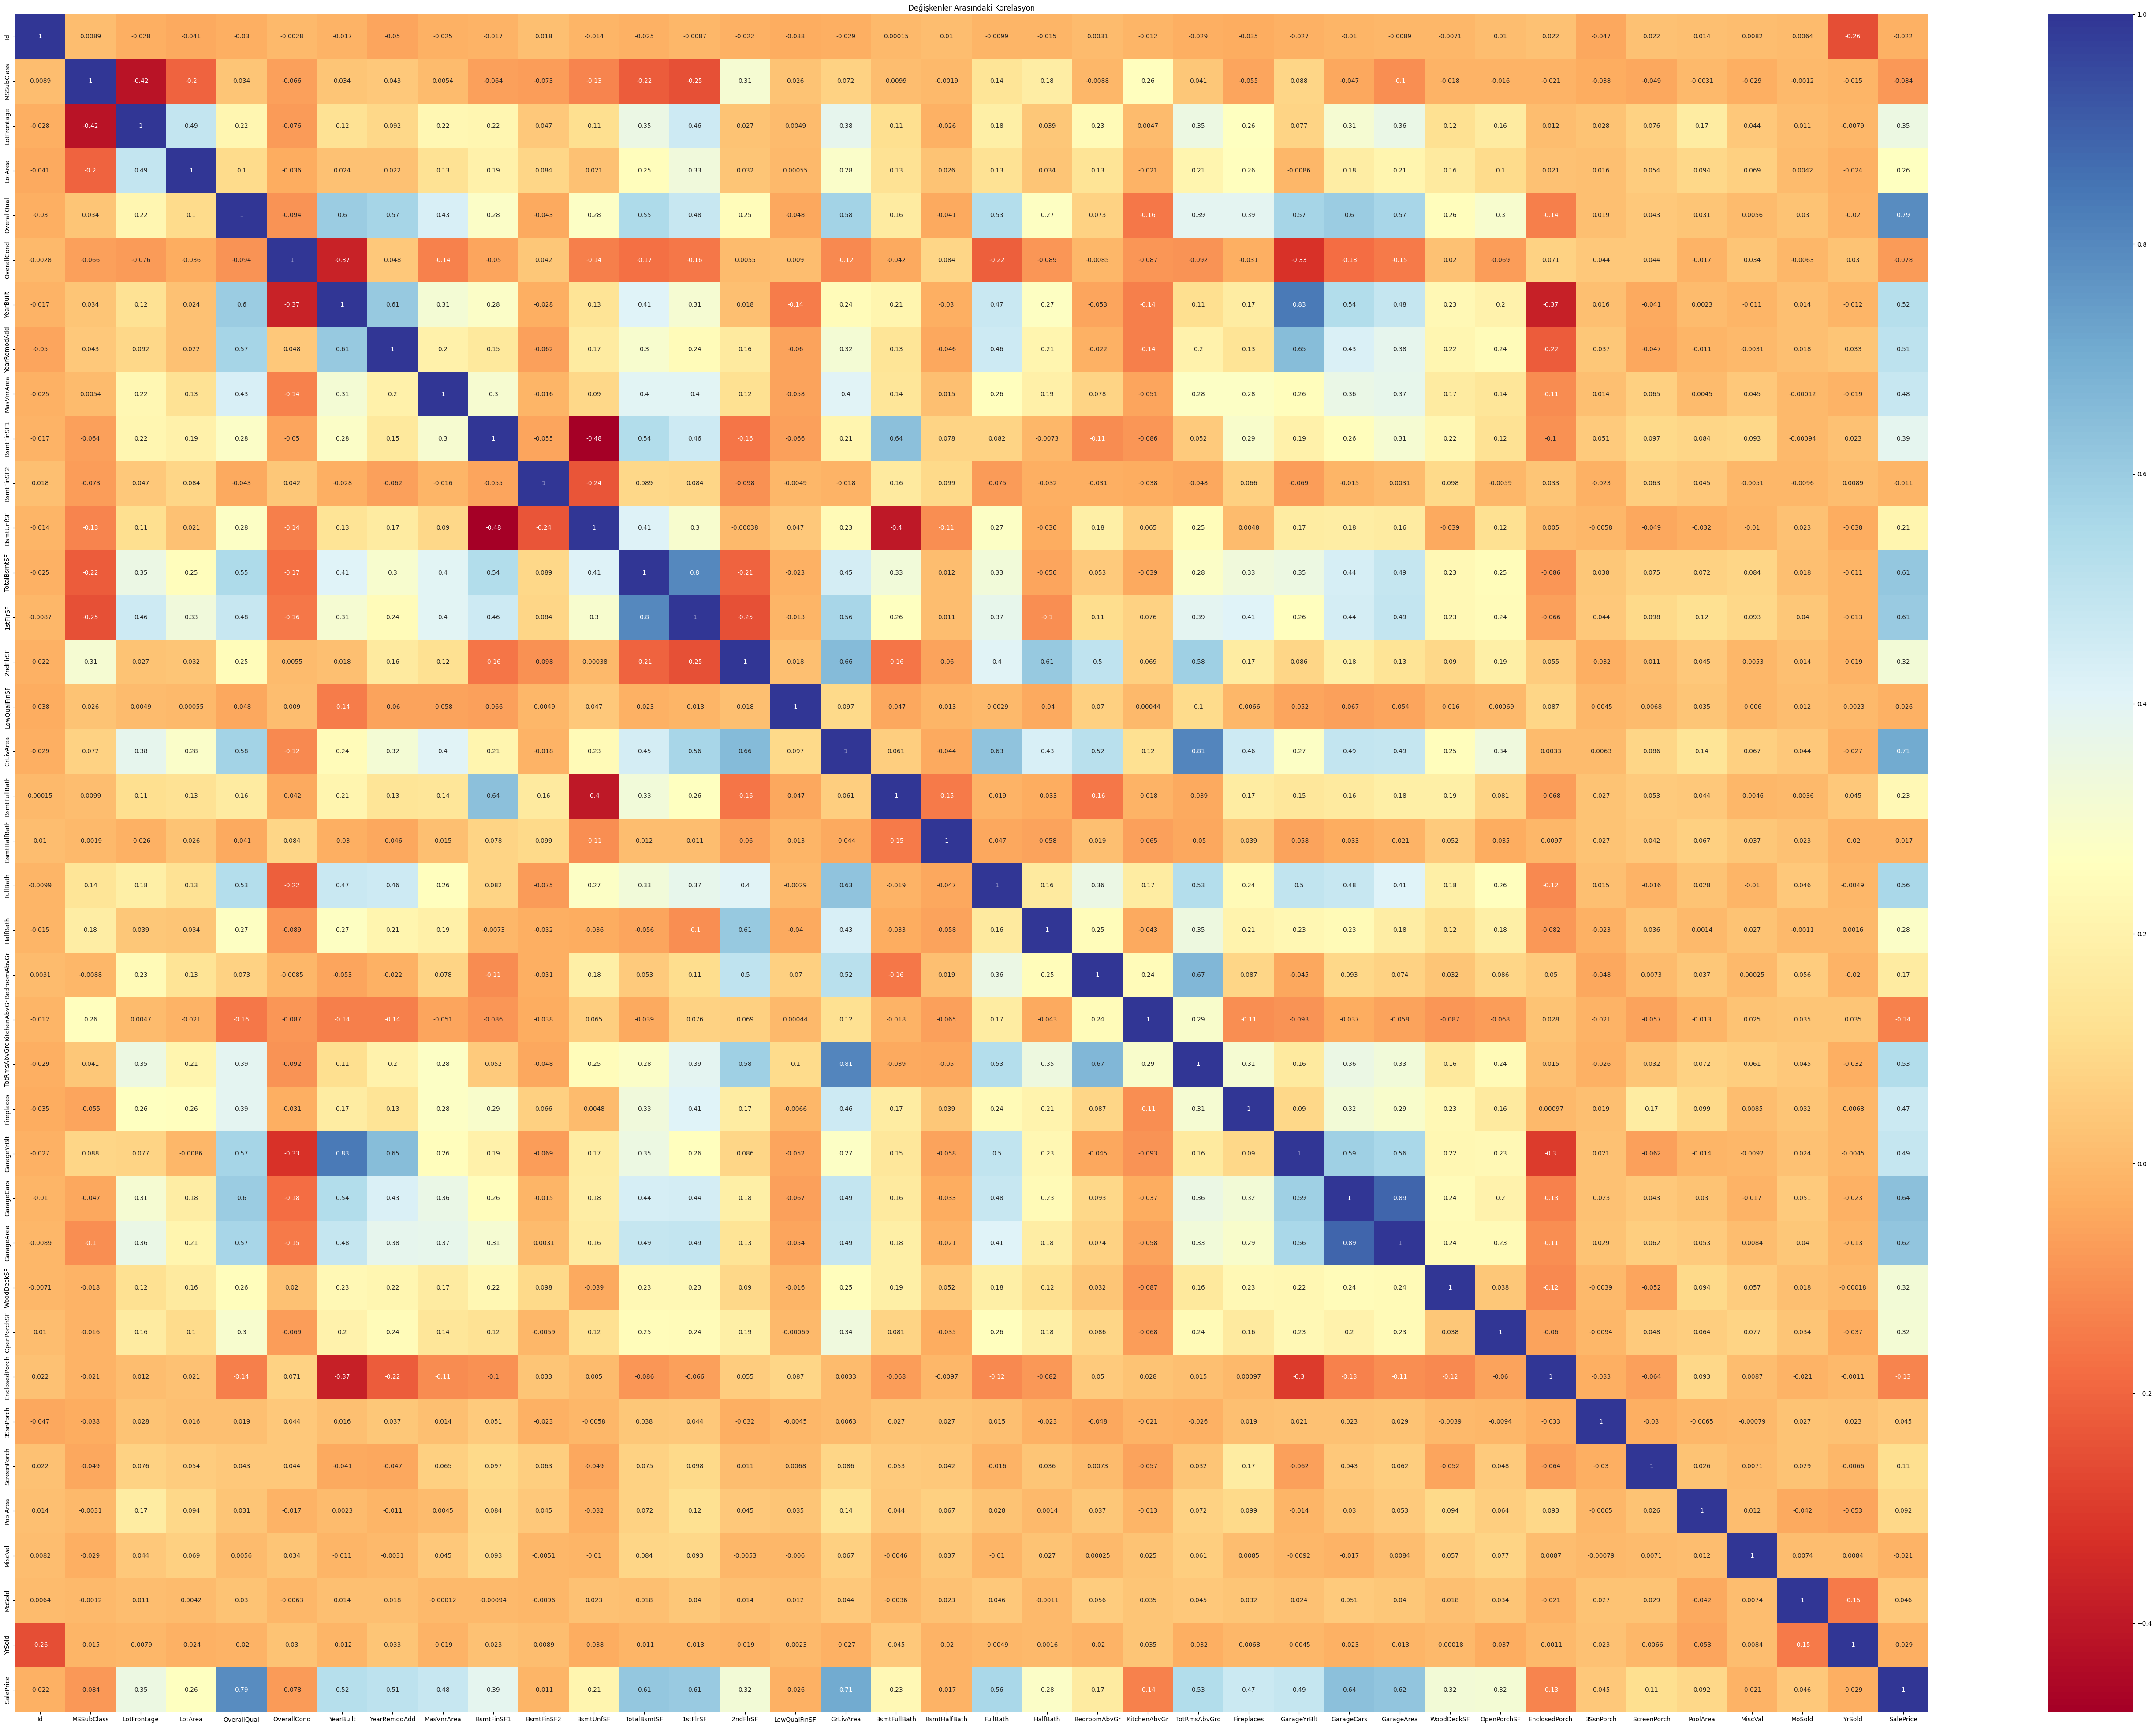

In [23]:
plt.figure(figsize=(70, 50))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="RdYlBu")
plt.title("Değişkenler Arasındaki Korelasyon")
plt.show()

In [24]:
#cogu bos olan sutunlari siliyoruz

In [25]:
df.drop(columns=['Alley','Fence','MiscFeature'], inplace=True)

In [26]:
df['MSSubClass'].value_counts()#Yapı sınıfı

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

In [27]:
df['MSZoning'].value_counts()#Genel imar sınıflandırması

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [28]:
df['LotFrontage'].value_counts()#Taşınmaza bağlanan caddenin doğrusal ayakları

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

In [29]:
df['LotArea'].value_counts()#Metrekare cinsinden parsel büyüklüğü

LotArea
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
15498     1
9439      1
7406      1
3013      1
10441     1
Name: count, Length: 1951, dtype: int64

In [30]:
df['Street'].value_counts()

Street
Pave    2907
Grvl      12
Name: count, dtype: int64

In [31]:
d={"Grvl":1,"Pave":2}
df["Street"]=df["Street"].map(d)

In [32]:
df['LotShape'].value_counts()#arsa parseli

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64

In [33]:
d={"Reg":4,"IR1":3,"IR1":2,"IR3":1}
df["LotShape"]=df["LotShape"].map(d)

In [34]:
df['LandContour'].value_counts()#arazi durumu

LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

In [35]:
d={"Lvl":4,"HLS":3,"Bnk":2,"Low":1}
df["LandContour"]=df["LandContour"].map(d)

In [36]:
df['Utilities'].value_counts()#temel hizmetlere erişim durumu

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [37]:
d={"AllPub":2,"NoSeWa":1}
df["Utilities"]=df["Utilities"].map(d)

In [38]:
df['LotConfig'].value_counts()#Parti konfigürasyonu

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64

In [39]:
df['LandSlope'].value_counts()#mulkun egimi

LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64

In [40]:
d={"Gtl":3,"Mod":2,"Sev":1}
df["LandSlope"]=df["LandSlope"].map(d)

In [41]:
df['Neighborhood'].value_counts()#fiziksel konum

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [42]:
df['Condition1'].value_counts()

Condition1
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64

In [43]:
df['Condition2'].value_counts()

Condition2
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64

In [44]:
df['BldgType'].value_counts()

BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

In [45]:
df['HouseStyle'].value_counts()

HouseStyle
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [46]:
d={"1Story":1,"2Story":6,"1.5Fin":5,"SLvl":2,"SFoyer":3,"2.5Unf":7,"1.5Unf":4,"2.5Fin":8}
df["HouseStyle"]=df["HouseStyle"].map(d)

In [47]:
df['OverallQual'].value_counts()# Genel malzeme ve kaplama kalitesi

OverallQual
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64

In [48]:
df['OverallCond'].value_counts()#Genel durum değerlendirmesi

OverallCond
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: count, dtype: int64

In [49]:
df['YearBuilt'].value_counts()#insa edildigi yil

YearBuilt
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1896      1
1902      1
1913      1
1879      1
1904      1
Name: count, Length: 118, dtype: int64

In [50]:
df['YearRemodAdd'].value_counts()#restore edildigi yil

YearRemodAdd
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1986     12
1981     12
1983     11
1982      9
Name: count, Length: 61, dtype: int64

In [51]:
df['RoofStyle'].value_counts()

RoofStyle
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64

In [52]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [53]:
df['Exterior1st'].value_counts()#dış cephe kaplama malzemeleri

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [54]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [55]:
df['MasVnrType'].value_counts()#duvar kaplama tipi

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [56]:
d={"None":1,"BrkFace":2,"Stone":4,"BrkCmn":3}
df["MasVnrType"]=df["MasVnrType"].map(d)

In [57]:
df['MasVnrArea'].value_counts()#Metrekare cinsinden duvar kaplama alanı

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [58]:
df['ExterQual'].value_counts()#dis malezeme kalitesi

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [59]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["ExterQual"]=df["ExterQual"].map(d)

In [60]:
df['ExterCond'].value_counts()#dis malzeme mevcut durumu

ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64

In [61]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["ExterCond"]=df["ExterCond"].map(d)

In [62]:
df['Foundation'].value_counts()

Foundation
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

In [63]:
df['BsmtQual'].value_counts()#Bodrum katının yüksekliği

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

In [64]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["BsmtQual"]=df["BsmtQual"].map(d)

In [65]:
df['BsmtCond'].value_counts()#bodrum genel durum

BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

In [66]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["BsmtCond"]=df["BsmtCond"].map(d)

In [67]:
df['BsmtExposure'].value_counts()#Dışarı çıkma veya bahçe seviyesi bodrum duvarları

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [68]:
d={"No":0,"Gd":3,"Av":2,"Mn":1}
df["BsmtExposure"]=df["BsmtExposure"].map(d)

In [69]:
df['BsmtFinType1'].value_counts()#Bodrum bitmiş alanın kalitesi

BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64

In [70]:
d={"Unf":0,"GLQ":5,"ALQ":4,"Rec":3,"BLQ":2,"LwQ":1}
df["BsmtFinType1"]=df["BsmtFinType1"].map(d)

In [71]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64

In [72]:
d={"Unf":0,"GLQ":5,"ALQ":4,"Rec":3,"BLQ":2,"LwQ":1}
df["BsmtFinType2"]=df["BsmtFinType2"].map(d)

In [73]:
df['BsmtFinSF1'].value_counts()#Tip 1 bitmiş metrekare

BsmtFinSF1
0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
383.0       1
1085.0      1
900.0       1
1022.0      1
337.0       1
Name: count, Length: 991, dtype: int64

In [74]:
df['BsmtFinSF2'].value_counts()#Tip 2 bitmiş metrekare

BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64

In [75]:
df['BsmtUnfSF'].value_counts()#bodrum tamamlanmis metrekare

BsmtUnfSF
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: count, Length: 1135, dtype: int64

In [76]:
df['TotalBsmtSF'].value_counts()#bodrum tamamlanmis metrekare

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [77]:
df['Heating'].value_counts()

Heating
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

In [78]:
df['HeatingQC'].value_counts()#isitma kalitesi

HeatingQC
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: count, dtype: int64

In [79]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["HeatingQC"]=df["HeatingQC"].map(d)

In [80]:
df['CentralAir'].value_counts()#merkezi klima var mi yok mu

CentralAir
Y    2723
N     196
Name: count, dtype: int64

In [81]:
d={"Y":1,"N":0}
df["CentralAir"]=df["CentralAir"].map(d)

In [82]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [83]:
df['1stFlrSF'].value_counts()#1.kat metrekare

1stFlrSF
864     46
1040    28
912     19
848     18
816     18
        ..
814      1
1281     1
1980     1
1249     1
1960     1
Name: count, Length: 1083, dtype: int64

In [84]:
df['2ndFlrSF'].value_counts()#2.kat metrekare

2ndFlrSF
0       1668
546       23
728       18
504       17
720       13
        ... 
456        1
831        1
826        1
985        1
1004       1
Name: count, Length: 635, dtype: int64

In [85]:
df['LowQualFinSF'].value_counts()#Düşük kaliteli tamamlanmış metrekareler (tüm katlar)

LowQualFinSF
0       2879
80         4
205        2
360        2
512        1
697        1
108        1
312        1
259        1
514        1
431        1
1064       1
362        1
384        1
114        1
140        1
479        1
397        1
436        1
120        1
481        1
232        1
53         1
515        1
156        1
473        1
420        1
390        1
371        1
392        1
144        1
572        1
528        1
234        1
513        1
450        1
Name: count, dtype: int64

In [86]:
df['GrLivArea'].value_counts()#yasam alani metrekare

GrLivArea
864     41
1092    26
1040    25
1456    20
1200    18
        ..
1459     1
1247     1
438      1
2622     1
1778     1
Name: count, Length: 1292, dtype: int64

In [87]:
df['BsmtFullBath'].value_counts()#bodrum tam banyo

BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64

In [88]:
df['BsmtHalfBath'].value_counts()#bodrum yarim banyo

BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64

In [89]:
df['FullBath'].value_counts()#zemin tam banyolar

FullBath
2    1530
1    1309
3      64
0      12
4       4
Name: count, dtype: int64

In [90]:
df['HalfBath'].value_counts()#zemin yarim banyo

HalfBath
0    1834
1    1060
2      25
Name: count, dtype: int64

In [91]:
df['BedroomAbvGr'].value_counts()#bedroom sayisi

BedroomAbvGr
3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: count, dtype: int64

In [92]:
df['KitchenAbvGr'].value_counts()#kitchen sayisi

KitchenAbvGr
1    2785
2     129
0       3
3       2
Name: count, dtype: int64

In [93]:
df['KitchenQual'].value_counts()#kitchen kalite

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [94]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["KitchenQual"]=df["KitchenQual"].map(d)

In [95]:
df['TotRmsAbvGrd'].value_counts()#toplam oda (banyolar hariç)

TotRmsAbvGrd
6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
2       1
14      1
13      1
15      1
Name: count, dtype: int64

In [96]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [97]:
d={"Typ":4,"Min2":1,"Min1":2,"Mod":3,"Maj1":5,"Maj2":6,"Sev":7}
df["Functional"]=df["Functional"].map(d)

In [98]:
df['Fireplaces'].value_counts()#fireplace sayisi

Fireplaces
0    1420
1    1268
2     219
3      11
4       1
Name: count, dtype: int64

In [99]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [100]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["FireplaceQu"]=df["FireplaceQu"].map(d).fillna(0)

In [101]:
df['GarageType'].value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

In [102]:
df['GarageYrBlt'].value_counts()#garaj insa yili

GarageYrBlt
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: count, Length: 103, dtype: int64

In [103]:
df['GarageFinish'].value_counts()

GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64

In [104]:
d={"Unf":0,"RFn":1,"Fin":2}
df["GarageFinish"]=df["GarageFinish"].map(d)

In [105]:
df['GarageCars'].value_counts()#kac arac alir

GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64

In [106]:
df['GarageArea'].value_counts()#metrekaresi

GarageArea
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
872.0       1
923.0       1
192.0       1
1025.0      1
272.0       1
Name: count, Length: 603, dtype: int64

In [107]:
df['GarageQual'].value_counts()

GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64

In [108]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["GarageQual"]=df["GarageQual"].map(d)

In [109]:
df['GarageCond'].value_counts()

GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

In [110]:
d={"TA":3,"Gd":4,"Ex":5,"Fa":2,"Po":1}
df["GarageCond"]=df["GarageCond"].map(d)

In [111]:
df['PavedDrive'].value_counts()#asfalt yol var mi yes no ve P;kismen

PavedDrive
Y    2641
N     216
P      62
Name: count, dtype: int64

In [112]:
d={"Y":2,"N":0,"P":1}
df["PavedDrive"]=df["PavedDrive"].map(d)

In [113]:
df['WoodDeckSF'].value_counts()#Metrekare cinsinden ahşap deck alanı

WoodDeckSF
0      1523
100      74
192      70
144      61
168      56
       ... 
436       1
448       1
361       1
362       1
530       1
Name: count, Length: 379, dtype: int64

In [114]:
df['OpenPorchSF'].value_counts()#Metrekare cinsinden açık sundurma alanı

OpenPorchSF
0      1298
36       52
48       51
40       44
32       38
       ... 
229       1
205       1
263       1
213       1
225       1
Name: count, Length: 252, dtype: int64

In [115]:
df['EnclosedPorch'].value_counts()#kapali sundurma alani

EnclosedPorch
0      2460
112      22
96       13
144      11
192      10
       ... 
214       1
220       1
19        1
174       1
23        1
Name: count, Length: 183, dtype: int64

In [116]:
df['3SsnPorch'].value_counts()#Metrekare cinsinden üç mevsim sundurma alanı

3SsnPorch
0      2882
168       3
153       3
144       2
216       2
180       2
140       1
86        1
176       1
219       1
120       1
174       1
150       1
360       1
225       1
255       1
224       1
304       1
290       1
407       1
96        1
320       1
23        1
162       1
182       1
130       1
196       1
245       1
238       1
508       1
323       1
Name: count, dtype: int64

In [117]:
df['ScreenPorch'].value_counts()#Metrekare cinsinden ekran sundurma alanı

ScreenPorch
0      2663
144      13
192      11
168      10
120       9
       ... 
233       1
190       1
265       1
222       1
104       1
Name: count, Length: 121, dtype: int64

In [118]:
df['PoolArea'].value_counts()#Metrekare cinsinden havuz alanı

PoolArea
0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: count, dtype: int64

In [119]:
df['PoolQC'].value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [120]:
df.loc[df['PoolArea'] != 0, 'PoolQC'] = df.loc[df['PoolArea'] != 0, 'PoolQC'].map({'Ex': 3, 'Gd': 2, 'Fa': 1}).fillna(1)

In [121]:
df['MiscVal'].value_counts()# Çeşitli özelliklerin $Değeri

MiscVal
0        2816
400        18
500        13
450         9
600         8
2000        7
700         7
1500        3
650         3
1200        3
480         2
2500        2
3000        2
4500        2
750         1
900         1
17000       1
6500        1
1000        1
80          1
1512        1
455         1
460         1
490         1
1150        1
300         1
12500       1
8300        1
1400        1
560         1
620         1
54          1
1300        1
3500        1
800         1
15500       1
350         1
420         1
Name: count, dtype: int64

In [122]:
#df['MiscFeature'].value_counts()

In [123]:
#df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [124]:
df['MoSold'].value_counts()#Satılan Ay

MoSold
6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: count, dtype: int64

In [125]:
df['YrSold'].value_counts()#satildigi yil

YrSold
2007    692
2009    647
2008    622
2006    619
2010    339
Name: count, dtype: int64

In [126]:
df['SaleType'].value_counts()#Satılma sekli

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [127]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

## VERI GORSELLESTIRMESI

In [128]:
#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(),annot=True);

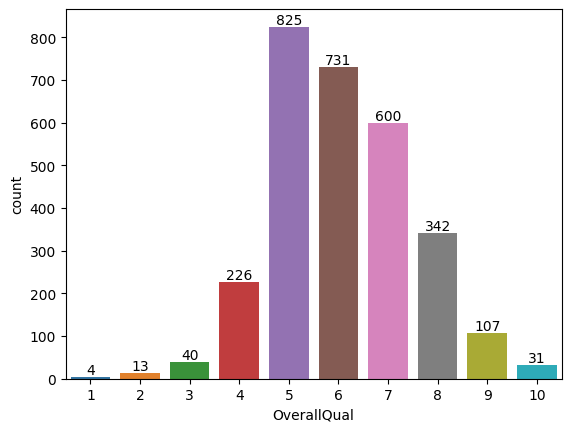

In [129]:
ax=sns.countplot(x=df["OverallQual"])
ax.bar_label(ax.containers[0]);

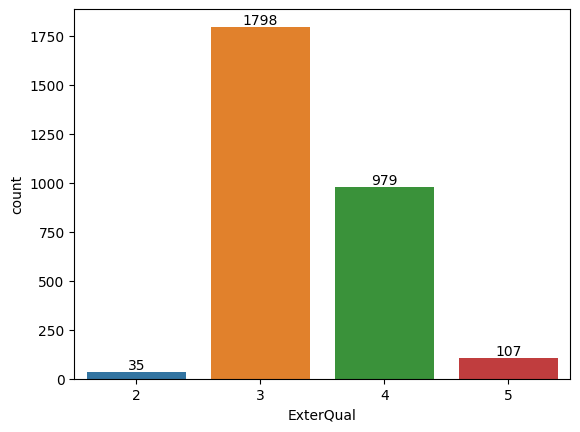

In [130]:
ax=sns.countplot(x=df["ExterQual"])
ax.bar_label(ax.containers[0]);

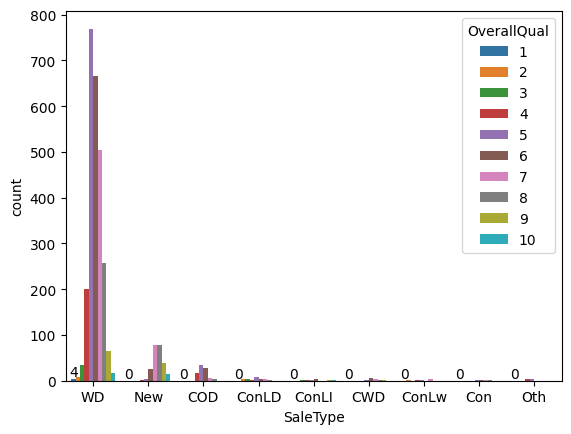

In [131]:
ax=sns.countplot(x=df["SaleType"],hue=df["OverallQual"])
ax.bar_label(ax.containers[0]);

In [132]:
df["SalePrice"].min()

34900.0

In [133]:
df["SalePrice"].max()

755000.0

## Bos Verileri Dolduruyoruz

In [134]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 78, dtype: int64

In [135]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

PoolQC          2906
MasVnrType      1766
SalePrice       1459
LotFrontage      486
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
LotShape          76
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Exterior2nd        1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
dtype: int64


In [136]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode().iloc[0])

In [137]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode().iloc[0])

In [138]:
df.groupby('BsmtQual')['BsmtFullBath'].apply(lambda x: x.mode())

BsmtQual   
2.0       0    0.0
3.0       0    0.0
4.0       0    0.0
5.0       0    1.0
Name: BsmtFullBath, dtype: float64

In [139]:
df['BsmtQual'] = df['BsmtQual'].fillna(df.groupby('BsmtFullBath')['BsmtQual'].transform(lambda x: x[x != 0].mode()[0]))

In [143]:
abs(df.corr(numeric_only=True)["MasVnrArea"].sort_values(ascending=False))

MasVnrArea       1.000000
SalePrice        0.480567
OverallQual      0.434790
GrLivArea        0.403334
TotalBsmtSF      0.397948
                   ...   
KitchenAbvGr     0.051626
LowQualFinSF     0.058056
EnclosedPorch    0.111217
LotShape         0.127513
OverallCond      0.136731
Name: MasVnrArea, Length: 61, dtype: float64

In [141]:
df.groupby('MasVnrArea')['OverallQual'].mean()

MasVnrArea
0.0        5.615650
1.0        4.666667
3.0        6.000000
11.0       7.000000
14.0       7.000000
            ...    
1170.0    10.000000
1224.0     8.000000
1290.0     8.000000
1378.0    10.000000
1600.0     7.000000
Name: OverallQual, Length: 444, dtype: float64

In [148]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df.groupby('OverallQual')['MasVnrArea'].transform('mean'))

In [153]:
df['MasVnrType'].isnull().sum()

1766

In [154]:
abs(df.corr(numeric_only=True)["MasVnrType"].sort_values(ascending=False))

MasVnrType      1.000000
SalePrice       0.265904
ExterQual       0.258022
KitchenQual     0.255076
BsmtQual        0.247006
                  ...   
LandSlope       0.107679
BedroomAbvGr    0.111004
HalfBath        0.123220
OverallCond     0.124490
LowQualFinSF         NaN
Name: MasVnrType, Length: 61, dtype: float64

In [155]:
df.groupby('MasVnrType')['ExterQual'].apply(lambda x: x.mode())

MasVnrType   
2.0         0    3
3.0         0    3
4.0         0    4
Name: ExterQual, dtype: int64

In [156]:
df['MasVnrType'] = df['MasVnrType'].fillna(df.groupby('ExterQual')['MasVnrType'].transform(lambda x: x[x != 0].mode()[0]))

In [157]:
abs(df.corr(numeric_only=True)["LotFrontage"].sort_values(ascending=False))

LotFrontage    1.000000
LotArea        0.489896
1stFlrSF       0.458247
GrLivArea      0.382462
GarageArea     0.359786
                 ...   
OverallCond    0.075508
HouseStyle     0.105206
LotShape       0.187053
MSSubClass     0.417359
Utilities           NaN
Name: LotFrontage, Length: 61, dtype: float64

In [158]:
df.groupby('LotFrontage')['LotArea'].mean()

LotFrontage
21.0      1724.800000
22.0     11064.000000
24.0      2266.428571
25.0      4835.000000
26.0      8524.666667
             ...     
174.0    20278.500000
182.0    14572.000000
195.0    41600.000000
200.0    43500.000000
313.0    45768.500000
Name: LotArea, Length: 128, dtype: float64

In [159]:
df['LotFrontage']=df['LotFrontage'].fillna(df.groupby('LotArea')['LotFrontage'].transform('mean'))

In [160]:
df['LotFrontage']=df['LotFrontage'].fillna(df.groupby('1stFlrSF')['LotFrontage'].transform('mean'))

In [161]:
df['LotFrontage']=df['LotFrontage'].fillna(df.groupby('MSSubClass')['LotFrontage'].transform('mean'))

In [162]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

PoolQC          2906
SalePrice       1459
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtFinType2      80
BsmtFinType1      79
LotShape          76
MSZoning           4
Functional         2
Utilities          2
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


In [163]:
import numpy as np
import pandas as pd

# SalePrice sütununu dışında tam sayı sütunlardaki eksik değerleri ortalama ile doldurma
integer_columns = df.select_dtypes(include=[np.number]).columns
integer_columns = integer_columns.drop('SalePrice')  # SalePrice sütununu hariç tutma
df[integer_columns] = df[integer_columns].fillna(df[integer_columns].mean())

# string sütunlardaki eksik değerleri mod ile doldurma
string_columns = df.select_dtypes(include=[np.object_]).columns
df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])

/tmp/ipykernel_33/3958772233.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[string_columns] = df[string_columns].fillna(df[string_columns].mode().iloc[0])


## sutun turlerini duzenliyoruz

In [164]:
df[['LotFrontage', 'MasVnrArea','GarageYrBlt','GarageCars','GarageArea']] = df[['LotFrontage', 'MasVnrArea','GarageYrBlt','GarageCars','GarageArea']].astype(int)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   int64  
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   LotShape       2919 non-null   float64
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   float64
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## feature engineering

In [166]:
df['bathroom'] = df['FullBath'] + df['HalfBath']

In [167]:
df['Bsmtbathroom'] = df['BsmtHalfBath'] + df['BsmtFullBath']

In [168]:
df['generalqual'] = df['OverallQual'] + df['GarageQual'] +df['KitchenQual']+df['ExterQual']+df['BsmtQual']+df['HeatingQC']

In [169]:
df['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

In [170]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901])

In [171]:
df['GarageYrBlt'].unique()

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953, 1978, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979,
       1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988,
       1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910,
       1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938, 1952,
       1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933, 1917, 1896,
       1895, 2207, 1943, 1919])

In [172]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [173]:
df['grgage']=df['YrSold']-df['GarageYrBlt']

In [174]:
df['YearRemodAdd']=df['YearRemodAdd'].fillna(df['YearBuilt'])

In [175]:
df["age"]=df['YrSold']-df["YearRemodAdd"]

In [176]:
df['age'].unique()

array([ 5, 31,  6, 36,  8, 14,  2, 58, 43,  0, 46, 48, 40, 39,  4, 44, 57,
        9, 10,  1, 51, 19,  3, 53, 41, 24, 28, 47, 56, 52, 11, 60, 21, 34,
        7, 42, 13, 27, 12, 45, 16, 25, 30, 33, 54, 20, 37, 50, 15, 38, 17,
       32, 35, 22, 18, 59, 29, 49, 26, -1, 55, 23, -2])

In [177]:
df['age']=df['age'].replace(-1,0)
df['age']=df['age'].replace(-2,0)

In [178]:
df['MSZoning'].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [208]:
corr=abs(df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False))

In [215]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [217]:
corr

SalePrice                1.000000
generalqual              0.793907
OverallQual              0.790982
GrLivArea                0.708624
ExterQual                0.682639
KitchenQual              0.659600
BsmtQual                 0.650138
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
bathroom                 0.568267
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
FireplaceQu              0.520438
YearRemodAdd             0.507101
Foundation_PConc         0.497734
GarageFinish             0.496146
MasVnrArea               0.480558
GarageYrBlt              0.471316
Fireplaces               0.466929
HeatingQC                0.427649
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
BsmtExposure             0.348279
LotFrontage              0.339283
Neighborhood_N

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 191 entries, Id to SaleCondition_Partial
dtypes: bool(124), float64(24), int64(43)
memory usage: 1.8 MB


In [184]:
df = pd.get_dummies(df, drop_first=True)

In [185]:
df.head(1460).to_pickle('housepredictsale.pkl')

In [186]:
#df.to_pickle('housepredict.pkl')

In [187]:
#!pip install lightgbm

In [188]:
#!pip install xgboost

### MODELLEME 

In [189]:
import pandas as pd
import xgboost as xgb
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [190]:
train=df[:1460]#1460 train kalani test icin oldugu icin bos olanlar ilk 891 oldugunu biliyoruz
test=df[1460:]

In [191]:
x = train.drop(["SalePrice"], axis=1)
y = train["SalePrice"]

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Import evaluation metrics and model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import preprocessing
from sklearn.preprocessing import StandardScaler

In [198]:
def algo_test(x, y):
    # Define all the regression models
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree', 'Gradient Boosting',
                  'AdaBoost', 'KNeighborsRegressor', 'Decision Tree', 'XGBRegressor', 'SVR', 'mlp_regressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []

    # Create a dataframe to store the results
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for algo, name in zip(algos, algo_names):
        algo.fit(x_train, y_train)
        p = algo.predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p) ** 0.5)
        mae.append(mean_absolute_error(y_test, p))

    # Populate the result dataframe
    result['R_Squared'] = r_squared
    result['RMSE'] = rmse
    result['MAE'] = mae

    # Sort the result dataframe based on R-squared score in descending order
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable

In [201]:
results = algo_test(x, y)
print(results)

                        R_Squared          RMSE           MAE
XGBRegressor         8.946938e-01  2.842065e+04  1.740818e+04
Gradient Boosting    8.877241e-01  2.934609e+04  1.678708e+04
Ridge                8.748899e-01  3.097798e+04  1.919017e+04
ElasticNet           8.492850e-01  3.400049e+04  1.992595e+04
AdaBoost             8.446362e-01  3.452088e+04  2.460112e+04
Decision Tree        7.859543e-01  4.051914e+04  2.705023e+04
Extra Tree           7.580923e-01  4.307564e+04  2.868436e+04
Lasso                7.183681e-01  4.647804e+04  2.065020e+04
KNeighborsRegressor  6.929261e-01  4.853202e+04  2.936782e+04
Linear               6.847203e-01  4.917619e+04  2.099427e+04
mlp_regressor        6.675103e-01  5.050054e+04  3.169126e+04
SVR                 -2.464483e-02  8.865303e+04  5.955674e+04
SGD                 -8.619519e+23  8.131084e+16  7.448640e+16


In [202]:
# Gradient Boosting Regressor modelini oluşturma
model = XGBRegressor()

# Modeli eğitme
model=model.fit(x,y)

In [203]:
# Test veri setinde tahminler yapma
tahmin = model.predict(test.drop(['SalePrice'], axis=1))

In [204]:
sonuc=pd.DataFrame()

In [205]:
sonuc['Id']=df2['Id']
sonuc['SalePrice']=tahmin

In [206]:
sonuc

,Id,SalePrice
0,1461,117633.421875
1,1462,156586.750000
2,1463,189999.406250
3,1464,189067.203125
4,1465,220114.046875
...,...,...
1454,2915,77598.656250
1455,2916,78864.109375
1456,2917,148645.296875
1457,2918,108301.921875


In [207]:
sonuc.to_csv('Evfiyattahmin.csv',index=False)

In [218]:
x = train.drop(["SalePrice",'RoofMatl_Membran', 'SaleType_CWD', 'ExterCond', 'LotConfig_FR3', 'Neighborhood_SawyerW', 'SaleType_ConLI', 'Utilities', 'Condition1_RRAn', 'RoofMatl_Tar&Grv', 'Condition1_RRNe', 'BldgType_TwnhsE', 'Condition2_RRAe', 'Foundation_Wood', 'RoofMatl_Metal', 'RoofStyle_Mansard', 'LandContour', 'LotConfig_FR2', 'BsmtFinSF2', 'Foundation_Stone', 'RoofMatl_Roll', 'Condition2_RRAn', 'SaleCondition_Alloca', 'Exterior2nd_Stone', 'BsmtHalfBath', 'Exterior1st_Plywood'], axis=1)
y = train["SalePrice"]

In [219]:
results = algo_test(x, y)
print(results)

                        R_Squared          RMSE           MAE
Gradient Boosting    9.001470e-01  2.767499e+04  1.644280e+04
XGBRegressor         8.975154e-01  2.803730e+04  1.717672e+04
Linear               8.794494e-01  3.040827e+04  1.930844e+04
Lasso                8.785278e-01  3.052428e+04  1.926250e+04
Ridge                8.778524e-01  3.060902e+04  1.879404e+04
ElasticNet           8.491637e-01  3.401417e+04  1.994795e+04
AdaBoost             8.402075e-01  3.500944e+04  2.496923e+04
Decision Tree        7.859442e-01  4.052009e+04  2.688258e+04
Extra Tree           7.797276e-01  4.110427e+04  2.684221e+04
KNeighborsRegressor  6.959534e-01  4.829220e+04  2.911138e+04
mlp_regressor        6.516046e-01  5.169436e+04  3.287551e+04
SVR                 -2.464426e-02  8.865301e+04  5.955672e+04
SGD                 -9.986324e+22  2.767641e+16  2.490363e+16


In [222]:
# Gradient Boosting Regressor modelini oluşturma
model = GradientBoostingRegressor()

# Modeli eğitme
model=model.fit(x,y)

In [223]:
# Test veri setinde tahminler yapma
tahmin = model.predict(test.drop(['SalePrice','RoofMatl_Membran', 'SaleType_CWD', 'ExterCond', 'LotConfig_FR3', 'Neighborhood_SawyerW', 'SaleType_ConLI', 'Utilities', 'Condition1_RRAn', 'RoofMatl_Tar&Grv', 'Condition1_RRNe', 'BldgType_TwnhsE', 'Condition2_RRAe', 'Foundation_Wood', 'RoofMatl_Metal', 'RoofStyle_Mansard', 'LandContour', 'LotConfig_FR2', 'BsmtFinSF2', 'Foundation_Stone', 'RoofMatl_Roll', 'Condition2_RRAn', 'SaleCondition_Alloca', 'Exterior2nd_Stone', 'BsmtHalfBath', 'Exterior1st_Plywood'], axis=1))

In [224]:
sonuc=pd.DataFrame()

In [225]:
sonuc['Id']=df2['Id']
sonuc['SalePrice']=tahmin

In [226]:
sonuc.to_csv('Evfiyattahmin.csv',index=False)